In [1]:
from torch.utils.data import DataLoader

from scripts.dataset_loader import MicroscopyDataset

# Load dataset
data = MicroscopyDataset(
    csv_file="../data/newData/labels.csv",
    root_dir="../data/newData",
    transform=None
)



Total unique samples found: 29


In [2]:
data.samples

{'Sample_001': [('../data/newData\\Sample_001\\fov1\\fad.tiff',
   '../data/newData\\Sample_001\\fov1\\nadh.tiff',
   '../data/newData\\Sample_001\\fov1\\shg.tiff',
   '../data/newData\\Sample_001\\fov1\\orr.tiff',
   77),
  ('../data/newData\\Sample_001\\fov2\\fad.tiff',
   '../data/newData\\Sample_001\\fov2\\nadh.tiff',
   '../data/newData\\Sample_001\\fov2\\shg.tiff',
   '../data/newData\\Sample_001\\fov2\\orr.tiff',
   77),
  ('../data/newData\\Sample_001\\fov3\\fad.tiff',
   '../data/newData\\Sample_001\\fov3\\nadh.tiff',
   '../data/newData\\Sample_001\\fov3\\shg.tiff',
   '../data/newData\\Sample_001\\fov3\\orr.tiff',
   77),
  ('../data/newData\\Sample_001\\fov4\\fad.tiff',
   '../data/newData\\Sample_001\\fov4\\nadh.tiff',
   '../data/newData\\Sample_001\\fov4\\shg.tiff',
   '../data/newData\\Sample_001\\fov4\\orr.tiff',
   77),
  ('../data/newData\\Sample_001\\fov5\\fad.tiff',
   '../data/newData\\Sample_001\\fov5\\nadh.tiff',
   '../data/newData\\Sample_001\\fov5\\shg.tiff',

In [3]:
# DataLoaders
dataloader = DataLoader(dataset=data, batch_size=64, shuffle=True)


In [4]:
def flatten_fovs(sample_list):
    return [fov for _, fovs in sample_list for fov in fovs]
data.samples = flatten_fovs(list(data.samples.items()))

In [5]:
for x, target in dataloader:
    print(x.shape)
    print(target.shape)
    break

torch.Size([64, 4, 512, 512])
torch.Size([64])


In [6]:
target

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

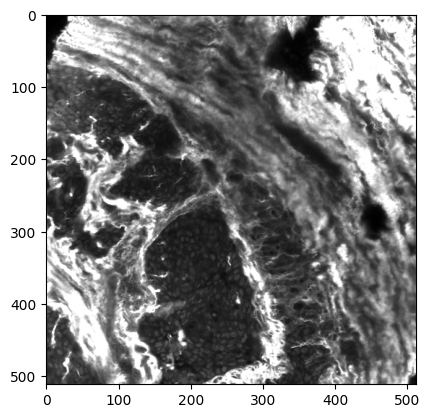

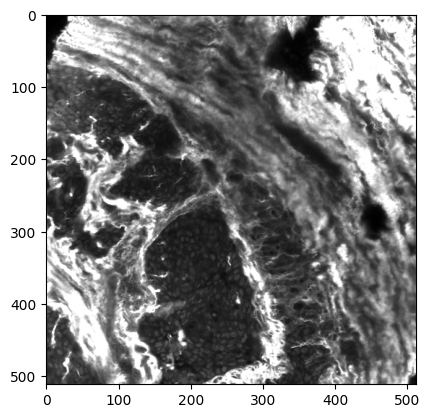

In [16]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0][0], cmap='gray')
plt.show()

import torch

torch.clamp(data[0][0][0], 0, 1)
plt.imshow(data[0][0][0], cmap='gray')
plt.show()

In [25]:
img = data[1][0][0]
import numpy as np
img[np.where(img == np.max(np.array(img)))]

tensor([52.8102, 52.8102, 52.8102,  ..., 52.8102, 52.8102, 52.8102])

_____________________________________________________
|	ROC-AUC                                 0.6465	|
|	Optimal Threshold from ROC             -1.0449	|
|	F1 Score                                0.5846	|
|	Optimal Threshold from F1             -39.4367	|
|	Average Precision                       0.5340	|
|	Accuracy at Threshold                   0.8069	|
|	Balanced Accuracy at Threshold          0.7071	|
_____________________________________________________


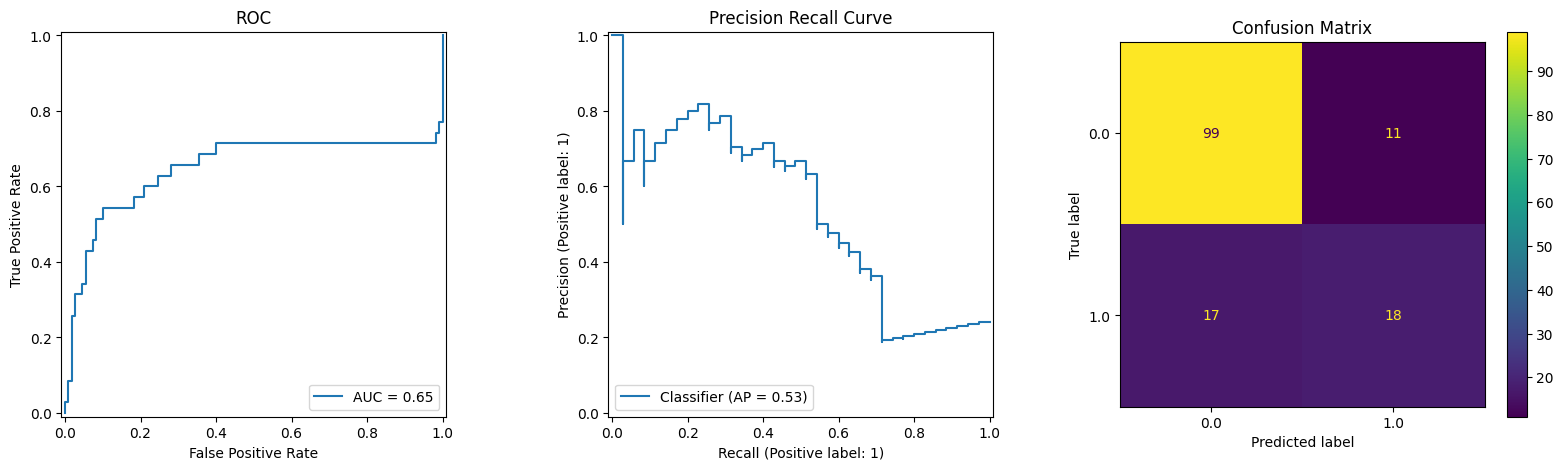

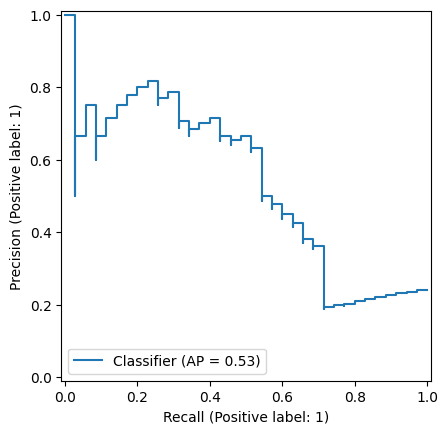

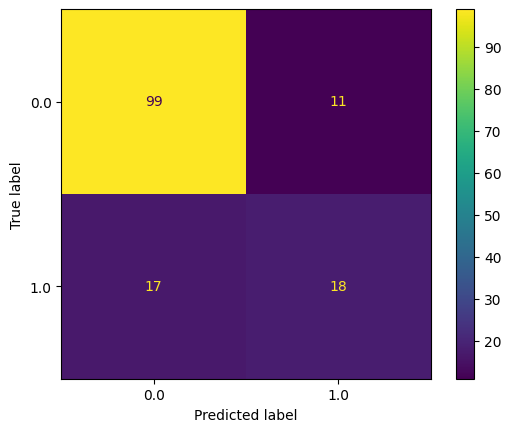

In [34]:

from models.microscopy_cnn import MicroscopyCNN
from scripts.model_metrics import score_model
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset=data, batch_size=64, shuffle=True)

model = MicroscopyCNN()
model.load_state_dict(torch.load(r'C:\Users\nmp002\PycharmProjects\HighlandsMachineLearning\results\best_classification_model.pt', map_location=torch.device('cpu'),weights_only=True))

scores,fig = score_model(model, dataloader,print_results=True, make_plot=True, threshold_type='roc')


In [31]:
torch.sum(torch.tensor([y for _, y in data])) / len(data)

tensor(0.2414)